# Fashion MNIST MLP 실습 (TensorFlow + Sequential)

이 실습에서는 TensorFlow의 Sequential API를 사용하여 다층 퍼셉트론(MLP) 모델로 Fashion MNIST 데이터셋을 분류하는 과정을 진행합니다.
Fashion MNIST는 28x28 크기의 흑백 의류 이미지로 구성되어 있으며, 총 10개의 클래스(셔츠, 바지, 신발 등)로 분류됩니다.
우리는 이 데이터를 불러오고, 정규화하며, MLP 모델을 만들고 학습시키며, 성능을 평가하고 예측 결과를 시각화하는 모든 단계를 실습합니다.

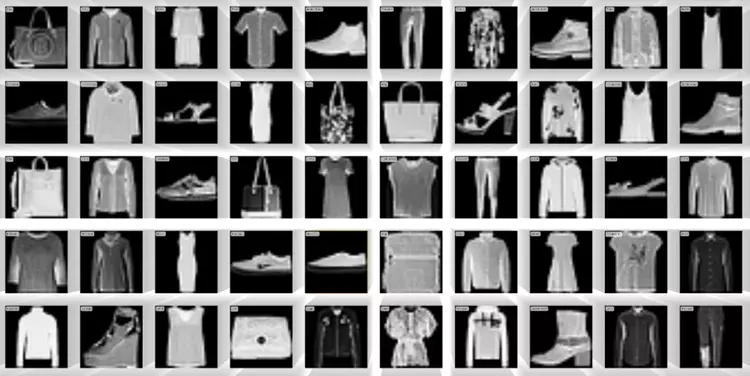

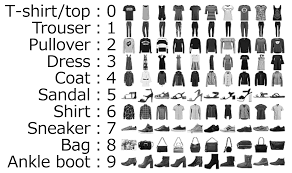

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# 설치된 나눔폰트 경로 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트 등록
fm.fontManager.addfont(font_path)
nanum_font = fm.FontProperties(fname=font_path).get_name()

# 기본 폰트 설정
plt.rcParams['font.family'] = nanum_font
plt.rcParams['axes.unicode_minus'] = False



## 데이터 불러오기 및 전처리

In [ ]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

print(f"훈련 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
훈련 데이터 크기: (60000, 28, 28), 테스트 데이터 크기: (10000, 28, 28)


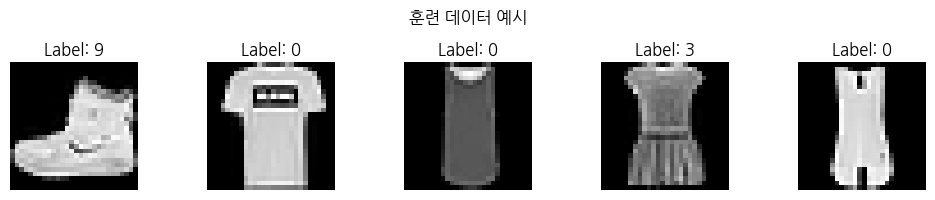

In [ ]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("훈련 데이터 예시")
plt.tight_layout()
plt.show()

## MLP 모델 구성

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

mlp_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

mlp_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

## Quiz1. 성능 조정 테스트

##  목표  
Fashion MNIST 데이터셋을 분류하는 **다층 퍼셉트론(MLP)** 모델을 직접 구성하고,  
모델 구조와 각 층의 역할을 이해하는 것이 목표입니다.

Fashion MNIST는 28×28 픽셀의 흑백 의류 이미지로 구성된 데이터셋이며, 총 10개 클래스로 구성하세요.

---
##  문제 조건

아래 조건에 맞는 모델을 구성하세요:

1. **입력층**  
   - 입력 데이터는 `(28, 28)` 크기의 흑백 이미지  
   - 이미지 데이터를 1차원 벡터로 변환할 것 (`Flatten` 사용)

2. **은닉층 1**  
   - 뉴런 수: `256개`  
   - 활성화 함수: `'relu'`  
   - 과적합 방지를 위한 Dropout (비율: 0.3)

3. **은닉층 2**  
   - 뉴런 수: `128개`  
   - 활성화 함수: `'relu'`  
   - Dropout (비율: 0.3)

4. **출력층**  
   - 뉴런 수: `10개` (클래스 수)  
   - 활성화 함수: `'softmax'`

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model_test = tf.keras.Sequential([

    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model_test.summary()


## 모델 컴파일 및 학습

In [ ]:
mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
history = mlp_model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7265 - loss: 0.7599 - val_accuracy: 0.8463 - val_loss: 0.4135
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8360 - loss: 0.4519 - val_accuracy: 0.8687 - val_loss: 0.3734
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8502 - loss: 0.4098 - val_accuracy: 0.8680 - val_loss: 0.3557
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8625 - loss: 0.3793 - val_accuracy: 0.8762 - val_loss: 0.3358
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8675 - loss: 0.3672 - val_accuracy: 0.8775 - val_loss: 0.3396
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8713 - loss: 0.3531 - val_accuracy: 0.8762 - val_loss: 0.3304
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8752 - loss: 0.3402 - val_accuracy: 0.8782 - val_loss: 0.3451
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8755 - loss: 0

## Quiz2. 컴파일 구조 변경

##  모델 컴파일 및 학습 실행하기 (최적화기 직접 설정)

앞서 구성한 MLP 모델 `model_test`를 컴파일하고, 학습시키는 코드를 완성해보세요.

---

### 조건

1. **Optimizer (최적화기)**  
   - `Adam` 최적화기를 직접 객체로 생성합니다.  
   - 학습률(`learning_rate`)은 **`0.0005`**로 설정하세요.

2. **Loss function (손실 함수)**  
   - 다중 클래스 분류 문제이며, 라벨은 정수형입니다.  
   - 적절한 손실 함수는?

3. **Metrics (평가지표)**  
   - 정확도(accuracy)를 사용합니다.

4. **학습 설정**  
   - 에폭 수: `10`  
   - 검증 데이터: 훈련 데이터의 `10%`
   

In [ ]:
model_test.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model_test.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7075 - loss: 0.8268 - val_accuracy: 0.8547 - val_loss: 0.3993
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8399 - loss: 0.4446 - val_accuracy: 0.8580 - val_loss: 0.3804
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8543 - loss: 0.4031 - val_accuracy: 0.8700 - val_loss: 0.3442
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8642 - loss: 0.3696 - val_accuracy: 0.8760 - val_loss: 0.3448
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8715 - loss: 0.3552 - val_accuracy: 0.8772 - val_loss: 0.3351
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8791 - loss: 0.3357 - val_accuracy: 0.8802 - val_loss: 0.3246
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8772 - loss: 0.3344 - val_accuracy: 0.8745 - val_loss: 0.3258
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8818 - loss: 0.31

## 학습 정확도 및 손실 시각화

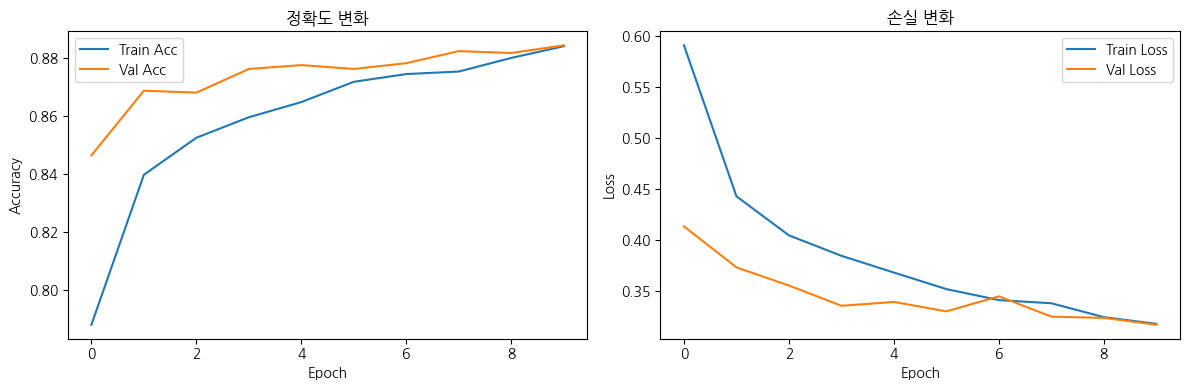

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('정확도 변화')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('손실 변화')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## Quiz3. 학습 정확도 및 손실 시각화

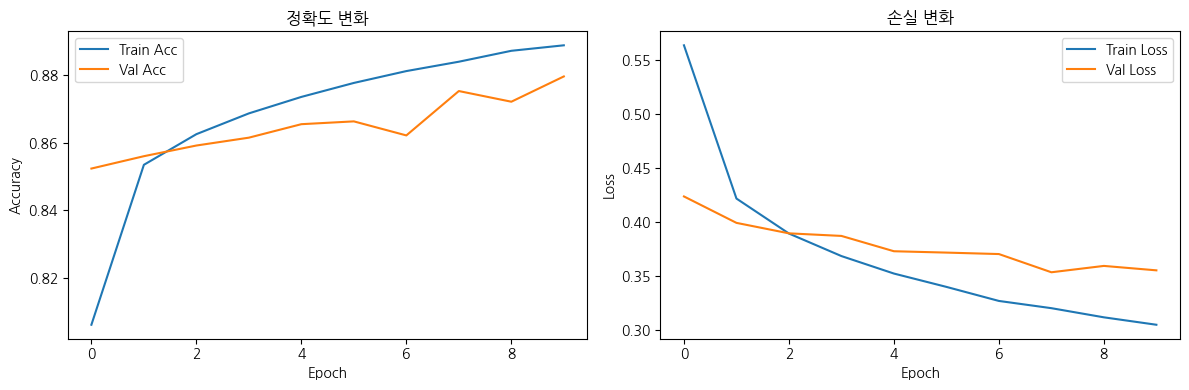

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('정확도 변화')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('손실 변화')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## 테스트 데이터 평가

In [ ]:
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(X_test, y_test)
print(f"\n최종 MLP 모델 테스트 정확도: {mlp_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8747 - loss: 0.3394

최종 MLP 모델 테스트 정확도: 0.8751


## Quiz4. 테스트 데이터 평가

In [ ]:
mlp_test_loss, mlp_test_acc = model_test.evaluate(X_test, y_test)
print(f"\n최종 MLP 모델 테스트 정확도: {mlp_test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8655 - loss: 0.3718

최종 MLP 모델 테스트 정확도: 0.8654


## 예측 결과 시각화

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


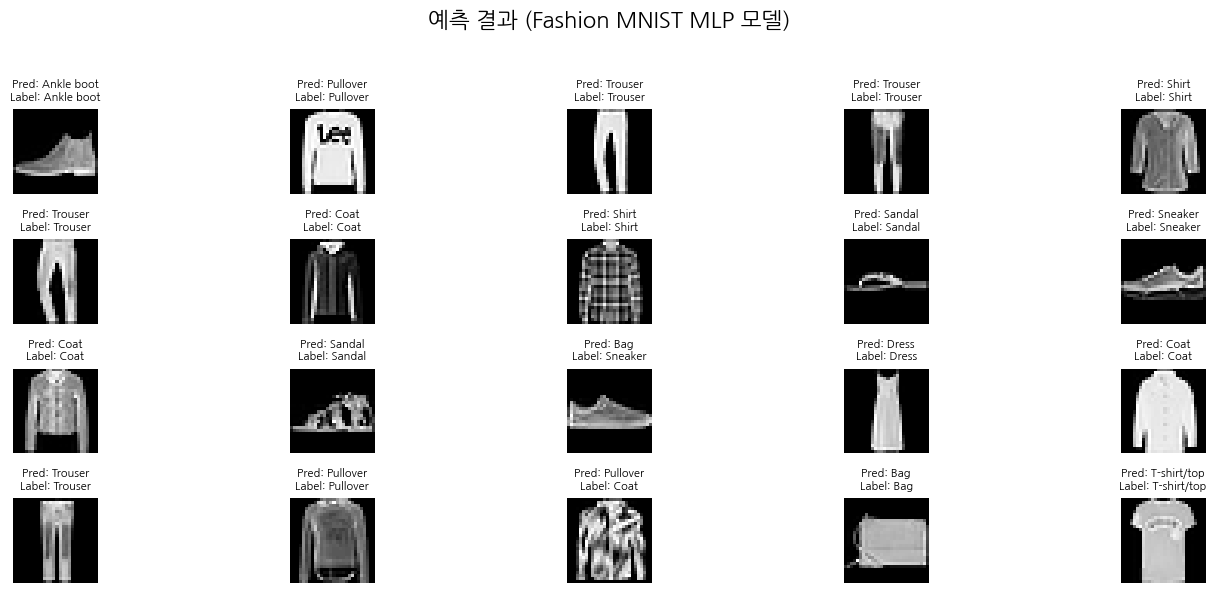

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predictions = mlp_model.predict(X_test[:20])
predicted_classes = np.argmax(predictions, axis=1)
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nLabel: {class_names[y_test[i]]}", fontsize=8)
    plt.axis('off')
plt.suptitle("예측 결과 (Fashion MNIST MLP 모델)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Quiz5.예측 결과 시각화

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


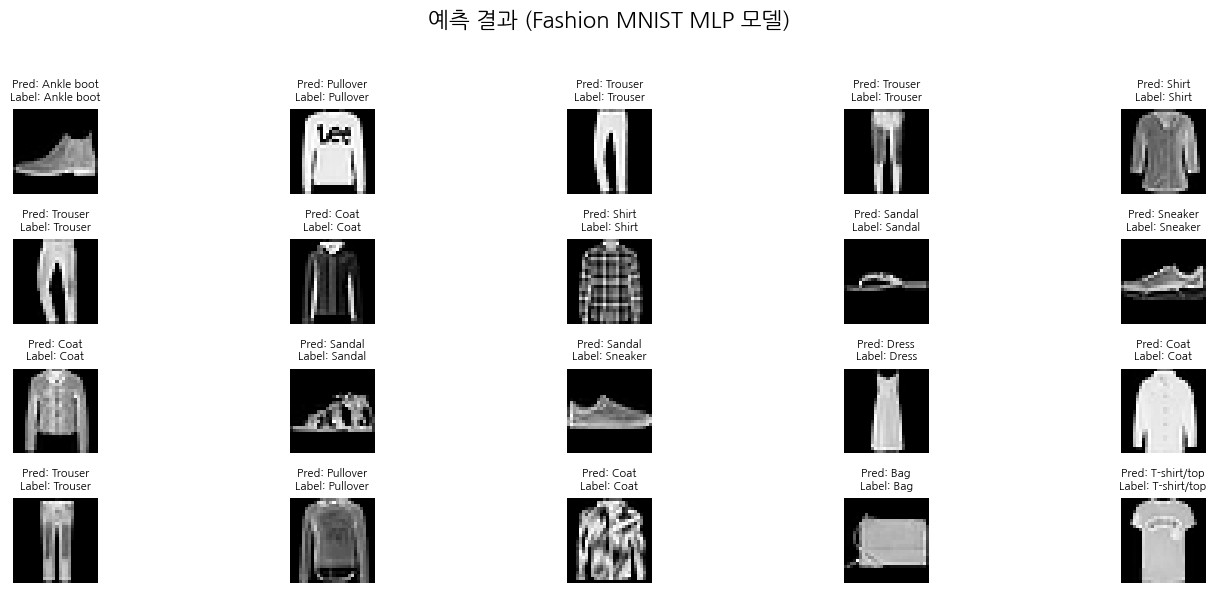

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
predictions = model_test.predict(X_test[:20])
predicted_classes = np.argmax(predictions, axis=1)
plt.figure(figsize=(15, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nLabel: {class_names[y_test[i]]}", fontsize=8)
    plt.axis('off')
plt.suptitle("예측 결과 (Fashion MNIST MLP 모델)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()